#### 4. Evaluating a model

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

3 methods of evaluating models
1. `score()` method - returns metric associated with the type of the model used
2. `scoring parameters`- passed to methods `cross_val_score()` or `GridSearchCV()` to tell SciKit to use specific type scoring metrics
3. `problem specific metric functions`- as standalone functions

scoring methods depend on the type of the problem

4.1. General model evaluation with `score()`

In [2]:
# import heart-disease.csv
hd= pd.read_csv("heart-disease.csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X= hd.drop("target", axis= 1)
y= hd["target"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

clf= RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
# beacuse of the classifier problem, `score()` uses mean accuracy method
# to find this, press `SHIFT+TAB`

0.8524590163934426

In [4]:
# import calfifornia-housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
h_df= pd.DataFrame(housing["data"], columns= housing["feature_names"])
h_df["target"]= housing["target"]
h_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X= h_df.drop("target", axis= 1)
y= h_df["target"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

model= RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)
# `score()` returns the coefficient of determination of the prediction

0.8065734772187598

4.2. Evaluating model with _`scoring parameter`_

_i_- `cross_val_score()`

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X= hd.drop("target", axis= 1)
y= hd["target"]

X_train, X_test,y_train, y_test= train_test_split(X, y, test_size= 0.2)

clf= RandomForestClassifier()
clf.fit(X_train, y_train)
print("score():", clf.score(X_test, y_test))
print("cross_val_score(): ", cross_val_score(clf, X, y))

score(): 0.8524590163934426
cross_val_score():  [0.81967213 0.86885246 0.81967213 0.78333333 0.76666667]


`score()` returns a single number.
`cross_val_score()` returns array because of a parameter called `cv`,stands for cross-validation.
When cv is not set, default `5` is used for size of `cross_val_score()` array.
`cross-validation` gives solution to _not training on all the data_ & _avoiding getting lucky scores on single splits of the data._

In [8]:
cross_val_score(clf, X, y, cv= 5)  # 5 fold corss-validation

np.random.seed(42)
# single training and test split score
clf_single_score= clf.score(X_test, y_test)
# take mean of 5-fold cross-validation
clf_cross_val_score= np.mean(cross_val_score(clf, X, y, cv= 5))
clf_single_score, clf_cross_val_score
# mean of corss-validation is less than single score
# for the accuracy of a model, use cross-validation

(0.8524590163934426, 0.8248087431693989)

By default the scoring parameter is set to `None`.

In [9]:
cross_val_score(clf, X, y, cv= 5, scoring= None) # default

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

When default is used, cross-validation uses same metric as score() for whatever model type.
for this example mean accuracy is used as default.

##### 4.2.1. Classification model evaluation metrics
Four main evaluation metrics/methods:
- accuracy
- area under ROC curve
- confusion matrix
- classification report

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = hd.drop("target", axis= 1)
y= hd["target"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

clf= RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

##### Accuracy
default & most used metric for score() within each scikit-learn classifier models
but not always the best method to use. 
Scikit-Learn return accuracy as decimal, but possible to convert to percentage.

In [11]:
# Accuracy as percentage
print(f"Heart disease classifier accuracy: {clf.score(X_test, y_test)*100:.2f}%")

Heart disease classifier accuracy: 85.25%


##### Area under Receiver Operating Characteristic (ROC) curve
comparison of true positive rate (tpr) versus false positive rate (fpr).

For clarity:
- true positive= model predicts 1 when truth is 1
- false positive= model predicts 1 when truth is 0
- true negative= model predicts 0 when truth is 0
- false negative= model predicts 0 when truth is 1

In [12]:
from sklearn.metrics import roc_curve
# make predictions with probabilities
y_probs= clf.predict_proba(X_test)
# keep prbabilities of positive class only
y_probs= y_probs[:, 1]   # probability of column of predictions of 1
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds= roc_curve(y_test, y_probs)
# check false positive rate
fpr, tpr

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
        0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
        0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
        0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ]),
 array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
        0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
        0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
        0.96875, 1.     , 1.     , 1.     ]))

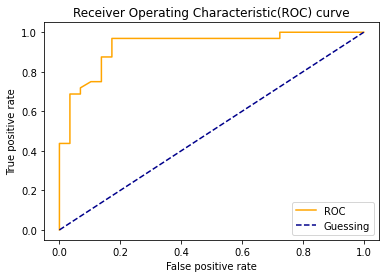

In [13]:
# define a function to plot roc_curve
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given fpr and tpr of a classifier
    """
    # plot ROC curve
    plt.plot(fpr, tpr, color= 'orange', label= 'ROC')
    # plot line with no predictive power (baselinne)
    plt.plot([0,1], [0,1], color= 'darkblue', linestyle= '--', label= 'Guessing')
    # customize the plot
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Receiver Operating Characteristic(ROC) curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

The model is far better than guessing.

AUC(Area Under Curve) = a metric used to quantify the ROC curve in a single number.

In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs)

0.9304956896551724

The most ideal position for ROC curve is to run along the top left corner of the plot. i.e., the model predicts only true positives and no false positives. And result in a ROC AUC score of 1.0. To check this, use y_test as y_probs. But in reality, perfect ROC is unlikely.

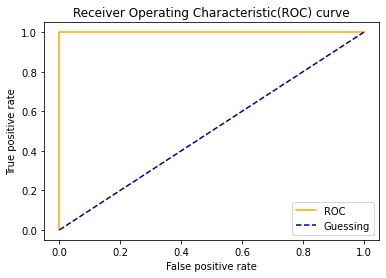

In [15]:
# Plot perfect ROC curve
fpr, tpr, thresholds= roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [16]:
# Perfect ROC AUC score
roc_auc_score(y_test, y_test)

1.0

##### Confusion matrix
a quick way to compare the predicted model labels to the actual model labels. This gives an idea where the model is getting confused.

In [17]:
from sklearn.metrics import confusion_matrix
y_preds= clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

To visualize this, use `pd.crosstab()`

In [18]:
pd.crosstab(y_test, y_preds, 
           rownames= ["Actual Labels"],
           colnames= ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [19]:
y_test.size, y_preds.size

(61, 61)

Creating _confussion matrix_ using Scikit-Learn
1. `sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y)`: takes fitted estimator, features and labels. it uses traind estimator to predict on X and compares it to y by displaying a confussion matrix.
2. `sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)`: takes truth and predicted labels and compares them by displaying a confussion matrix

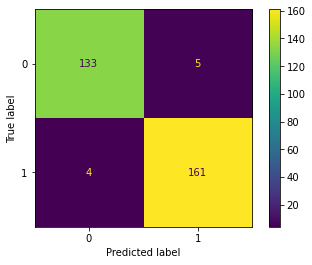

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X, y)

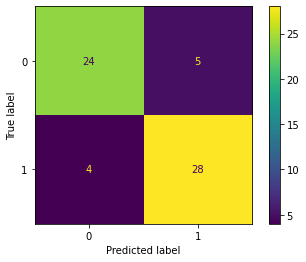

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

##### Classification Report
a collection of metrics rather than a single one.

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Returns four columns, and the number of rows depend on the number of classes of target (for this example, 0 & 1) but the last 3 rows are always there in classification_report

Each term measures something different:
- precision: indicates the proportion of positive identifications (class= 1) which were actually corrrect. no false positive prediction means precision of 1.0, average of the coumns in the confusion matrix, i.e., 0.86=24/(24+4)---true negative and 0.85=28/(5+28)---true positive
- recall: the proportion of actual positives which were correctly classified. no false negatives means recall of 1.0, i.e., 0.83=24/(24+5) & 0.88=28/(28+4)
- F1 score: combination of the above 2. perfect model has F1 score of 1.0, i.e., the average of precision and recall
- Support: number of samples each metric was calculated on, number of samples with truth values of 0 and 1
- accuracy: if equal to 1.0, means perfect prediction, average of F1-score
- macro avg: macro average, the average precision, recall and F1 score between classes.doesn't take class imbalance in effect
- weighted avg: weighted average of precision, recall and F1 score between classes. weighted means nmber of samples in each class is used to calculate the average. so favors the majority class


used where precision, F1 score and recall are needed to express prediction efficiency

In [23]:
disease_true= np.zeros(10000)
disease_true[0]= 1 # only 1 case is present(patient)
disease_preds= np.zeros(10000)  # every prediction is 0
pd.DataFrame(classification_report(disease_true, disease_preds,
                                  output_dict= True, zero_division= 0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


Summary:
- accuracy is usefull when the classes are balanced
- precision and recall are more usefull when the classes are imbalanced
- if false positive predictions are worse than false negatives, aim for higher precision, otherwise aim for higher recall

##### 4.2.2 Regression model evaluation metrics
- `R^2 or coefficient of determination`: compares model predictions to the mean of the target, values range from -ve infinity (very poor model) to 1.if model doesn't predict the mean of the target, R^2 would be 0. if it perfectly predicts the mean of the target, then R^2 value becomes 1.
- `Mean absolute error(MAE)`: average of absolute differences between predictions and actual values. gives idea about how the predictions are wrong
- `Mean square error(MSE)`: average squared differences between predictions and actual values. no negative errors. amplifies outliers(samples with large errors)

In [24]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X= h_df.drop("target", axis= 1)
y= h_df["target"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

model= RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

###### R^2 score (coefficient of determination)

In [25]:
model.score(X_test, y_test)

0.8065734772187598

In [26]:
# outside score() function
from sklearn.metrics import r2_score
# fill an array with y_test mean
# y_test_mean= np.full(len(y_test), y_test.mean())
y_preds= model.predict(X_test)
r2_score(y_test, y_preds)

0.8065734772187598

###### Mean absolute error (MAE)

In [27]:
from sklearn.metrics import mean_absolute_error
y_preds= model.predict(X_test)
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [28]:
df= pd.DataFrame(data= {"actual values:": y_test,
                    "predicted values:": y_preds})
df

,actual values:,predicted values:
20046,0.47700,0.493840
3024,0.45800,0.754940
15663,5.00001,4.928596
20484,2.18600,2.543160
9814,2.78000,2.331760
...,...,...
15362,2.63300,2.220380
16623,2.66800,1.947760
18086,5.00001,4.836378
2144,0.72300,0.717820


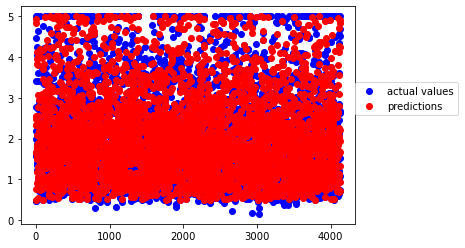

In [29]:
fig, ax= plt.subplots()
x= np.arange(0, len(df), 1)
ax.scatter(x, df["actual values:"], c='b', label= "actual values")
ax.scatter(x, df["predicted values:"], c= 'r', label= "predictions")
ax.legend(loc= (1, 0.5))

###### Mean squared error(MSE)

In [30]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

Summary:
- R^2 is similar to accuracy, gives quick indication of how well the model is doing, closer to 1 means the better the model
- MAE gives a better indication of how far off each of the model's predictions are on average

##### 4.2.3 Using scoring parameters
used to tell Scikit-Learn what evaluation metric to return using cross-validation

In [31]:
# classification model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X= hd.drop("target", axis= 1)
y= hd["target"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
clf= RandomForestClassifier(n_estimators= 100)
#clf.fit(X_train, y_train)

In [32]:
# default, mean accuracy
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [33]:
# average of cross-validation array values
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [34]:
# using scoring parameter
np.random.seed(42)
cv_acc= cross_val_score(clf, X, y, cv= 5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


Other metrics

In [35]:
# Precision
np.random.seed(42)
cv_prec= cross_val_score(clf, X, y, cv= 5, scoring= "precision")
print(f"The cross-validated precision is: {np.mean(cv_prec)*100:.2f}")

The cross-validated precision is: 83.30


In [36]:
# recall
np.random.seed(42)
cv_recall= cross_val_score(clf, X, y, cv= 5, scoring= "recall")
print(f"The cross-validated recall is: {np.mean(cv_recall)*100:.2f}%")

The cross-validated recall is: 85.45%


In [37]:
# F1-score
np.random.seed(42)
cv_f1score= cross_val_score(clf, X, y, cv=5, scoring= "f1")
print(f"The cross-validated F1-score is: {np.mean(cv_f1score)*100:.2f}%")

The cross-validated F1-score is: 84.27%


In [38]:
# regression model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = h_df.drop("target", axis=1)
y = h_df["target"]
#X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
model= RandomForestRegressor(n_estimators= 100)
model

RandomForestRegressor()

In [39]:
# r^2 ---- default
np.random.seed(42)
cv_r2= cross_val_score(model, X, y, cv= 5, scoring= "r2")
print(f"The cross-validated r^2 is: {np.mean(cv_r2):.2f}")

The cross-validated r^2 is: 0.65


In [40]:
# MAE using neg_mean_absolute_error
np.random.seed(42)
cv_mae= cross_val_score(model, X, y, cv= 5, scoring= "neg_mean_absolute_error")
print(f"The cross-validated MAE is: {np.mean(cv_mae):.2f}.")

The cross-validated MAE is: -0.47.


In [41]:
# MSE using neg_mean_squared_error
np.random.seed(42)
cv_mse= cross_val_score(model, X, y, cv= 5, scoring="neg_mean_squared_error")
print(f"The cross-validated MSE is: {np.mean(cv_mse):.2f}.")

The cross-validated MSE is: -0.43.


4.3 Using different evaluation metrics with Scikit-Learn ---- `problem specific metric functions`
They work by comparing an array of predicted values, y_preds, to actual array of actual labels, y_test.

Classification functions used for:
- accuracy, use accuracy_score()
- precision, use precision_score()
- recall, use recall_score()
- F1, use f1_score()

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X= hd.drop("target", axis= 1)
y= hd["target"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)
clf= RandomForestClassifier(n_estimators= 100)
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)
# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f}%")
print(f"F1-score: {f1_score(y_test, y_preds)*100:.2f}%")

Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1-score: 86.15%


Regression functions used for:
- R^2, use r2_score()
- MAE, use mean_absolute_error()
- MSE, use mean_squared_error()

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X= h_df.drop("target", axis= 1)
y= h_df["target"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)
model= RandomForestRegressor(n_estimators= 100)
model.fit(X_train, y_train)
y_preds= model.predict(X_test)
# evaluate
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

R^2: 0.81
MAE: 0.33
MSE: 0.25
